Importaciones básicas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Qué falta?

## Lecturas

CSV

In [3]:
df = pd.read_csv("trees.csv")

In [111]:
cultivos = pd.read_csv("tipo_cultivo.csv")

TXT

In [ ]:
tweets = pd.read_csv("Clean_Top_1000_Youtube_df - youtubers_df.txt", sep='\t', header=0)

Excel: Puedes especificar la hoja con 'sheet_name' si el archivo Excel tiene múltiples hojas

In [ ]:
df_excel = pd.read_excel('archivo.xlsx', sheet_name='nombre_hoja')

JSON

In [ ]:
df_json = pd.read_json('archivo.json')

TSV

In [ ]:
df = pd.read_csv('mLabel_tweets.tsv', sep='\t', encoding='latin1')

El error UnicodeDecodeError indica que hay un problema al intentar decodificar el archivo con el codec UTF-8. Algunos de los codecs comunes son 'utf-8', 'latin1', 'utf-16', entre otros. 

## Descriptivos

In [3]:
df.head()

,tree_id,legal_status,species,address,site_order,site_info,caretaker,date,dbh,plot_size,latitude,longitude
0,99001,DPW Maintained,Lophostemon confertus :: Brisbane Box,2190X North Point St,7.0,Sidewalk: Curb side : Cutout,DPW for City Agency,2011-04-18,NaN,3x3,37.802851,-122.443247
1,253633,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,1909 Judah St,1.0,Sidewalk: Curb side : Cutout,Private,2019-05-22,NaN,3x3,37.761311,-122.482618
2,96059,Permitted Site,Afrocarpus gracilior :: Fern Pine,101 Montcalm St,1.0,Sidewalk: Curb side : Cutout,Private,2011-08-03,NaN,3x3,37.746560,-122.406484
3,37613,DPW Maintained,Tristaniopsis laurina :: Swamp Myrtle,423 17th Ave,1.0,Sidewalk: Curb side : Cutout,Private,1998-06-26,7.0,NaN,37.779950,-122.476207
4,64585,Permitted Site,Ginkgo biloba :: Maidenhair Tree,3370 22nd St,1.0,Sidewalk: Curb side : Cutout,Private,1991-10-24,NaN,NaN,37.755276,-122.422575


In [13]:
df.shape

(10000, 12)

El dataframe es un csv con información de los árboles de la ciudad de San Francisco.  En el dataset hay 10000 filas y 12 columnas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tree_id       10000 non-null  int64         
 1   legal_status  9994 non-null   object        
 2   species       10000 non-null  object        
 3   address       9937 non-null   object        
 4   site_order    9827 non-null   float64       
 5   site_info     10000 non-null  object        
 6   caretaker     10000 non-null  object        
 7   date          10000 non-null  datetime64[ns]
 8   dbh           6346 non-null   float64       
 9   plot_size     4863 non-null   object        
 10  latitude      9875 non-null   float64       
 11  longitude     9875 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 937.6+ KB


Hay columnas de distintos tipos. 

Podemos ver que las únicas columnas con muchos nulos son dbh y plot_size.

La columna date no está en el formato correcto.

Proporciona estadísticas descriptivas para columnas numéricas, como recuento, media, desviación estándar, mínimo, máximo y percentiles.

In [12]:
df.describe()

,tree_id,site_order,date,dbh,latitude,longitude
count,10000.000000,9827.000000,10000,6346.000000,9875.000000,9875.000000
mean,65846.831900,2.669482,2002-08-20 20:43:52.320000128,6.307595,37.758804,-122.435381
min,2.000000,1.000000,1955-12-13 00:00:00,0.000000,37.509004,-122.511257
25%,35563.500000,1.000000,1996-11-18 06:00:00,3.000000,37.738818,-122.457126
50%,52127.500000,1.000000,2002-07-05 00:00:00,4.000000,37.760479,-122.430794
75%,86524.000000,3.000000,2009-03-11 06:00:00,8.000000,37.778076,-122.412354
max,261540.000000,111.000000,2020-01-25 00:00:00,80.000000,37.808912,-122.368651
std,50011.511981,4.400961,NaN,5.699869,0.024548,0.031108


Cantidad de valores únicos para cada columna

In [25]:
df.nunique()

tree_id         10000
legal_status        8
species           294
address          8464
site_order         51
site_info          20
caretaker          18
date             3480
dbh                43
plot_size         134
latitude         9029
longitude        9029
dtype: int64

Para ver cuáles son

In [26]:
df["legal_status"].unique()

array(['DPW Maintained', 'Permitted Site', 'Section 143', 'Undocumented',
       'Planning Code 138.1 required', 'Significant Tree',
       'Property Tree', 'Private', nan], dtype=object)

Cuántos registros hay para cada valor único

In [27]:
df["legal_status"].value_counts()

legal_status
DPW Maintained                  5274
Permitted Site                  4422
Planning Code 138.1 required     107
Undocumented                     102
Significant Tree                  37
Section 143                       33
Property Tree                     12
Private                            7
Name: count, dtype: int64

## Transformaciones de columnas

Renombrar

In [ ]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

map() :Es importante tener en cuenta que map() se utiliza para transformar valores de una columna. Se usa principalmente para aplicar una transformación a cada elemento individual de una Serie (columna) en un DataFrame.

Nueva columna: 0 si es ham 1 si es spam

In [ ]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})

apply() en Pandas se utiliza para aplicar funciones a lo largo de filas o columnas de un DataFrame o una Serie. 

### fechas

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Si el formato es 'DD-MM-AAAA'
df['fecha'] = pd.to_datetime(df['fecha_str'], format='%d-%m-%Y')

Columna año, mes, día en función de columna date

In [5]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

Convierte una columna a tipo de timedelta (diferencia entre dos fechas o tiempos).

In [ ]:
df['columna'] = pd.to_timedelta(df['columna'])

### numéricas

Por ejemplo, para convertir una columna a tipo int, float, str, datetime, etc.

In [ ]:
df['columna'] = df['columna'].astype(int)

Convierte una columna a tipo numérico (entero o flotante)

In [ ]:
df['columna'] = pd.to_numeric(df['columna'], errors='coerce')

errors='coerce' pone como NaN los que no puede transformar

### funciones

Aplicar transformaciones más complejas a una columna.

In [ ]:
def mi_funcion(valor):
    # Realizar transformación y retornar el nuevo valor
    return transformacion

df['columna'] = df['columna'].apply(mi_funcion)

## Filtrados

In [ ]:
df_filtrado = df[df['Edad'] > 30]

Puedes combinar condiciones usando operadores lógicos como & (AND), | (OR), ~ (NOT):

In [ ]:
df_filtrado = df[(df['Edad'] > 30) & (df['Puntuacion'] >= 80)]

In [ ]:
df[~df["Region"].isin(["WESTERN EUROPE",'EASTERN EUROPE'])]

In [ ]:
# Supongamos que df es tu DataFrame
df_filtrado = df[df['Nombre'].str.contains('Juan')]

In [ ]:
valores_filtrar = ['A', 'B', 'C']
df_filtrado = df[df['Columna'].isin(valores_filtrar)]

## Faltantes

### Eliminación

Eliminar los nulos de todo el df

In [ ]:
df_sin_nan = df.dropna()

Eliminar los nulos de una columna. subset=['Columna_A', 'Columna_B'] si quiero eliminar las filas que contengan nulos en alguna de esas columnas. Si una fila tiene un nulo en la columna A o en la B, la va a eliminar.

In [ ]:
df_sin_nulos_columna_A = df.dropna(subset=['Columna_A'])

### Análisis 

Para contar los valores nulos / no nulos en las columnas. isna() notna() isnull() notnull()

In [21]:
df.isnull().sum()

tree_id            0
legal_status       6
species            0
address           63
site_order       173
site_info          0
caretaker          0
date               0
dbh             3654
plot_size       5137
latitude         125
longitude        125
dtype: int64

Si quiero ver los registros que tienen valores nulos en alguna columna

In [24]:
df[df['address'].isnull()].head()

,tree_id,legal_status,species,address,site_order,site_info,caretaker,date,dbh,plot_size,latitude,longitude
244,84712,Permitted Site,Washingtonia robusta :: Mexican Fan Palm,NaN,6.0,Sidewalk: Curb side : Cutout,Private,2007-05-17,NaN,NaN,37.769025,-122.437947
461,35702,Permitted Site,Liriodendron tulipifera :: Tulip Tree,NaN,15.0,Sidewalk: Curb side : Cutout,Private,1998-04-10,NaN,NaN,NaN,NaN
526,45381,Permitted Site,Lophostemon confertus :: Brisbane Box,NaN,4.0,Sidewalk: Curb side : Cutout,Private,2001-07-06,NaN,NaN,37.792882,-122.480907
626,36839,Permitted Site,Tristaniopsis laurina :: Swamp Myrtle,NaN,5.0,Sidewalk: Curb side : Cutout,Private,1998-05-26,NaN,NaN,NaN,NaN
702,35285,Permitted Site,Olea europaea :: Olive Tree,NaN,4.0,Sidewalk: Curb side : Cutout,Private,1998-02-17,NaN,NaN,NaN,NaN


### Manejo

Rellenar los nulos

In [ ]:
df_con_ceros = df.fillna(0)

## Groupby

Funciones de agregación (por ejemplo, sum(), mean(), max(), min(), etc.)

Agrupar por una columna

In [ ]:
df.groupby('site_order').tree_id.count()

Si no le pongo tree id, lo va a hacer para todas las columnas

Agrupar por más de una columna

In [ ]:
df.groupby(['Columna1', 'Columna2']).sum()

Si quiero realizar más de una agregación

In [ ]:
resultado = df.groupby('Columna_A')['Columna_B'].agg(['sum', 'mean'])

In [33]:
resultado = df.groupby('Year')['tree_id'].count()

Si les quiero poner títulos

In [ ]:
resultados = df.groupby('Columna_A')['Columna_B'].agg(
    Suma='sum',
    Promedio='mean',
    Maximo='max',
    Minimo='min'
)

Si quiero agrupar y hacerle distintas funciones a distintas columnas

In [ ]:
resultados = df.groupby('Columna_A').agg({
    'Columna_B': ['sum', 'mean'],
    'Columna_C': 'max'
})

# Renombrar las columnas resultantes
resultados.columns = ['Suma_Columna_B', 'Promedio_Columna_B', 'Maximo_Columna_C']

Funciones creadas por nosotros

In [ ]:
def diferencia_max_min(x):
    return x.max() - x.min()

# Aplicar la función personalizada a 'Columna_B' por grupo en 'Columna_A'
resultado_personalizado = df.groupby('Columna_A')['Columna_B'].agg(diferencia_max_min)

## Otras

### Renombrar columnas

Todas a la vez

In [ ]:
df.columns = ['Nuevo_Nombre_A', 'Nuevo_Nombre_B']

Una en específico

In [ ]:
df.rename(columns={'A': 'Nuevo_Nombre_A'}, inplace=True)

Varias

In [ ]:
df.rename(columns={'A': 'Nuevo_Nombre_A', 'B': 'Nuevo_Nombre_B'}, inplace=True)

### Eliminacion de columnas

Elimino una columna

In [ ]:
df.drop('nombre_columna', axis=1, inplace=True)

Más de una columna

In [ ]:
columnas_a_eliminar = ['columna1', 'columna2', 'columna3']
df.drop(columns=columnas_a_eliminar, inplace=True)

### Duplicados

Eliminar duplicados

In [ ]:
df_sin_duplicados = df.drop_duplicates()

### Indices

Después de usar set_index(), la columna 'Country' ya no será una columna normal, sino el índice del DataFrame. Por ejemplo, después de usar set_index("Country", inplace=True), podrías acceder a filas específicas utilizando el nombre de un país: datos_pais = df.loc["Estados Unidos"]

In [ ]:
df.set_index("Country", inplace=True)

reset_index() :El resultado es una Serie que tiene 'Columna_A' como índice y la suma de 'Columna_B' como valores.  Al llamar a reset_index() con inplace=True, se crea un nuevo DataFrame donde 'Columna_A' se convierte en una columna regular en lugar de ser el índice

In [ ]:
resultados = df.groupby('Columna_A')['Columna_B'].sum()

# Resetear el índice después de groupby() para tener un DataFrame con índice numérico
resultados.reset_index(inplace=True)

### Sort

Ordenar de acuerdo al índice de mayor a menor

In [ ]:
df.sort_index(ascending=False)

Ordenar de acuerdo a una columna

In [ ]:
df.sort_values(by = 'GDP ($ per capita)', ascending=False)

## Plots

### Matplot

In [ ]:
plt.figure(figsize=(10,3)) # va primero



plt.legend()
plt.title("Precios por años")
plt.xlabel("Años")
plt.ylabel("Precios en dolares")

plt.xlim(right=3)  # adjust the right leaving left unchanged
plt.xlim(left=1)  # adjust the left leaving right unchanged
plt.ylim(top=3)  # adjust the top leaving bottom unchanged
plt.ylim(bottom=1)  # adjust the bottom leaving top unchanged
plt.ylim((0,3000))


plt.xticks(rotation=45) # rota eje x
plt.yticks(fontsize=12) # establece tamaño de la fuente del eje y

plt.show()

#### Líneas

Estilos de líneas 

Si quiero que aparezca la leyenda de la línea tengo que poner plt.legend()

In [ ]:
plt.plot(x, y, marker='o', linestyle='--', color='red', label='Línea 1')
plt.legend() 

Algunos valores comunes para marker: 'o' (círculo), 's' (cuadrado), '+', '*', 'x', '.'.

Algunos valores comunes para linestyle: '-' (sólida), '--' (discontinua), ':' (punteada), '-.' (punteado y discontinuo).

Algunos valores comunes para color: 'red', 'blue', 'green', 'black', etc. También se pueden usar códigos hexadecimales como '#FF5733'

Una sola línea

Primero tuve que agrupar por año, hacer un count de tree_id y resetear el indice

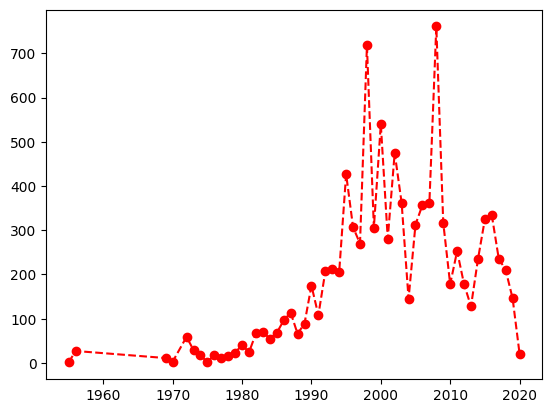

In [10]:
plt.plot(resultado["Year"], resultado["Cantidad"], marker='o', linestyle='--', color='red', label='Línea 1')

Múltiples líneas

Agrego una columna sin sentido solo para poder ver cómo se hacen gráficos con múltiples líneas

In [11]:
resultado["mas3"] = resultado["Cantidad"] + 100

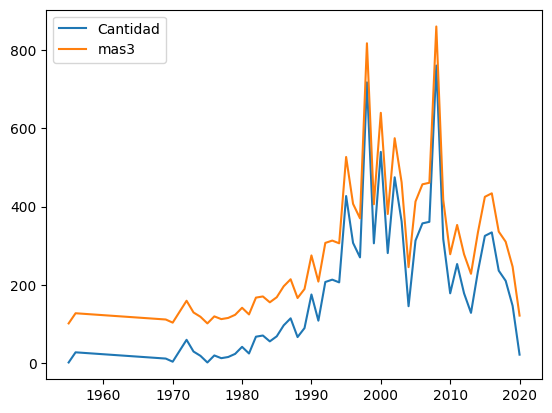

In [12]:
plt.plot(resultado["Year"], resultado["Cantidad"], label='Cantidad')
plt.plot(resultado["Year"], resultado["mas3"], label='mas3')

# Agregar leyenda
plt.legend()

Se les puede poner label pero a mi no me aparece

#### Barras

In [84]:
barras = df.groupby("legal_status").tree_id.count().reset_index()
barras.columns = ["legal_status", "cant"]

<BarContainer object of 8 artists>

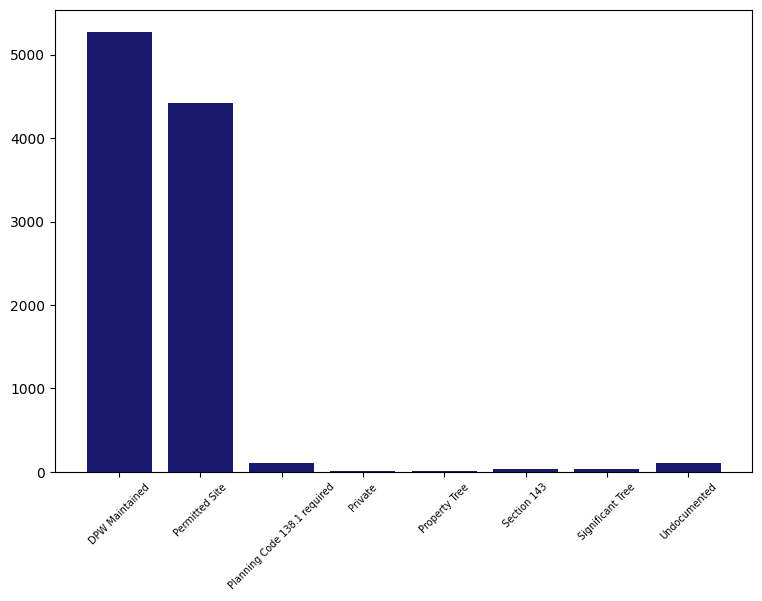

In [91]:
plt.figure(figsize=(9,6))
plt.xticks(rotation=45)
plt.xticks(fontsize=7)
plt.bar(x=barras["legal_status"],height=barras["cant"],color="midnightblue")

#### Histograma

(array([  28.,   14.,  176.,  535., 1491., 3259., 2685., 1812.]),
 array([1955.   , 1963.125, 1971.25 , 1979.375, 1987.5  , 1995.625,
        2003.75 , 2011.875, 2020.   ]),
 <BarContainer object of 8 artists>)

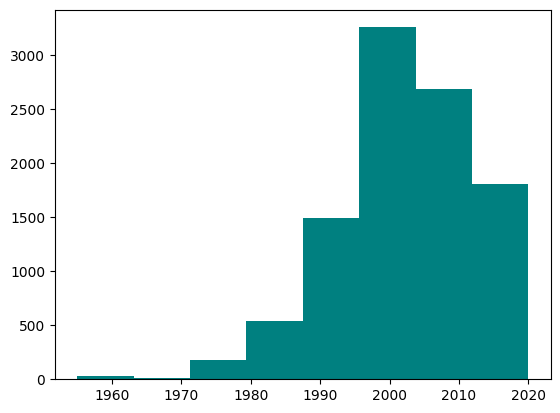

In [100]:
plt.hist(df["Year"], bins=8, color="#008080")

#### Scatterplot

Scatterplot básico con una sola categoría

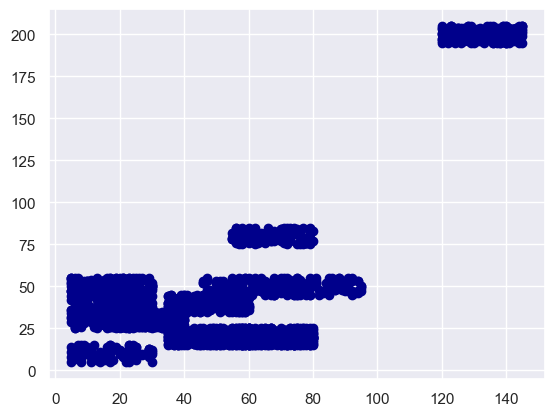

In [146]:
plt.scatter(x=cultivos["Contenido_de_Fosforo"], y=cultivos["Contenido_de_Potasio"],c="DarkBlue")

#### Subplot

Sintaxis: plt.subplot(rows, columns, index) Crea un solo subplot en una figura.
- Los argumentos rows y columns definen la disposición de la cuadrícula de subplots.
- El argumento index indica la posición del subplot actual en la cuadrícula.
- Los índices comienzan en 1 y van de izquierda a derecha y de arriba hacia abajo.
- Ejemplo: plt.subplot(2, 2, 1) crea un subplot en una cuadrícula de 2 filas y 2 columnas, en la posición superior izquierda.

plt.subplot(1,2,1): Crea el primer subplot. El primer número (1) significa una fila de subgráficos, el segundo número (2) indica dos columnas y el tercer número (1) indica que este es el primer subplot.

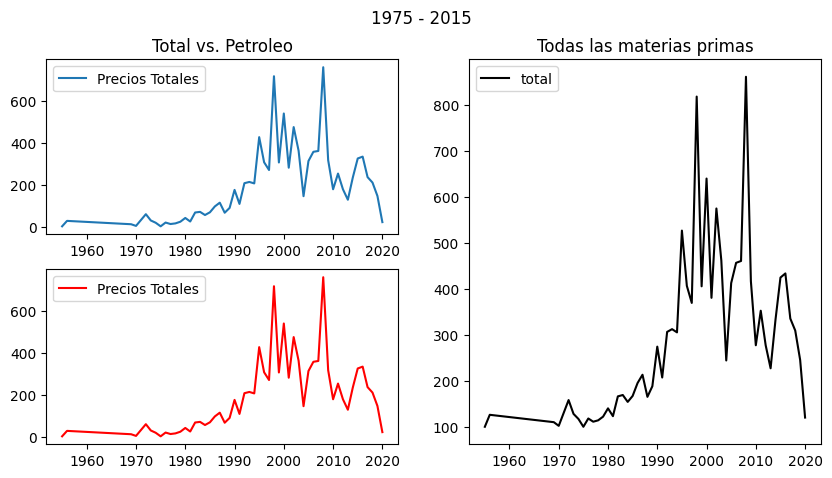

In [77]:
# Start a figure
plt.figure(figsize=(10,5))
# First subplot
plt.subplot(2,2,1)
plt.plot(resultado["Year"], resultado["Cantidad"], label="Precios Totales")
plt.title('Total vs. Petroleo')
plt.legend()

plt.subplot(2,2,3)
plt.plot(resultado["Year"], resultado["Cantidad"], label="Precios Totales", color = "red")
plt.legend()

# Second subplot
plt.subplot(1,2,2) 
plt.plot(resultado["Year"], resultado["mas3"], c='black', label="total")
plt.title("Todas las materias primas")
plt.legend()
# Global figure methods
plt.suptitle('1975 - 2015')
plt.show()

Otra manera
- (0,0) es donde comienza y despues indicamos cuanto ocupa


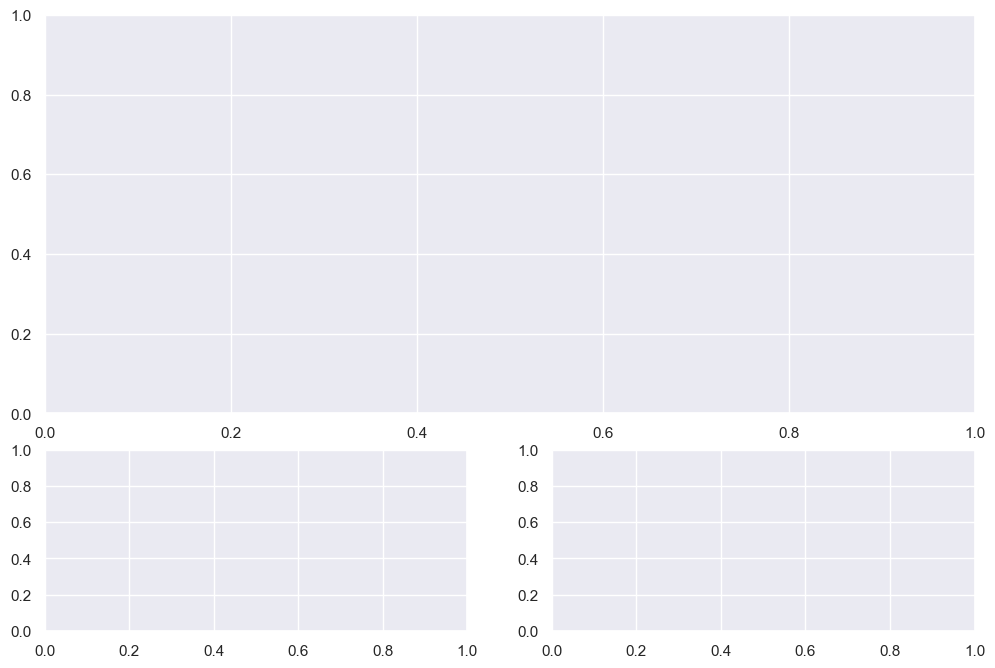

In [147]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2) 
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

#### Subplots

Es otra manera de hacer subplots

Sintaxis: fig, axs = plt.subplots(rows, columns, figsize=(width, height))
- Crea una figura y una matriz de subplots.
- Devuelve dos objetos: fig, que representa la figura completa, y axs, que es una matriz de ejes (subgráficos).
- Permite un manejo más eficiente de múltiples subplots al acceder a ellos a través de la matriz axs.
- Ejemplo: fig, axs = plt.subplots(2, 2) crea una figura con una matriz de 2x2 subplots.

- los subplots se acceden a través de la matriz axs usando índices de matriz estándar (por ejemplo, axs[0, 0], axs[0, 1]).

Utiliza la función plt.subplots() de Matplotlib para inicializar una figura y una matriz de subgráficos (axs) en una sola llamada.

plt.subplots(1, 2, figsize=(10,3)): Crea una figura y una matriz de subgráficos de 1 fila y 2 columnas, devolviendo dos objetos: fig, que representa la figura completa, y axs, que es una matriz de ejes (subgráficos) donde axs[0] representa el primer subplot y axs[1] el segundo.

In [ ]:
# Destructuring initialization
fig, axs = plt.subplots(1, 2, figsize=(10,3)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(eje_x_years, eje_y_prices, label="Precios Totales")
axs[0].plot(eje_x_years, petroleo_y, label="Precios Petroleo")
axs[0].set_title('Total vs. Petroleo')
axs[0].legend()
# Second subplot
axs[1].plot(eje_x_years, eje_y_prices, c='black')
axs[1].set_title("Todas las materias primas")
# Global figure methods
plt.suptitle('1975 - 2015')
plt.show()

### Seaborn

#### Regplot

Para graficar un scatterplot y agregar la línea de tendencia

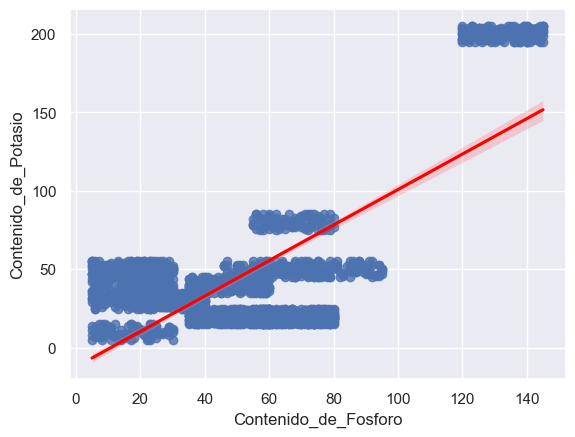

In [143]:
sns.regplot(x="Contenido_de_Fosforo",
            y="Contenido_de_Potasio",
            data= cultivos,
            line_kws={'color':'red'})
plt.show()


#### Lmplot

Acepta un conjunto de datos (data) y permite agregar una faceta (dividir el gráfico en subgráficos) según una variable categórica utilizando el argumento hue.

In [128]:
somecultivos = cultivos[cultivos["Tipo_de_Cultivo"].isin(["rice", "coffee"])]

Quizás la línea de tendencia no tiene tanto sentido

C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


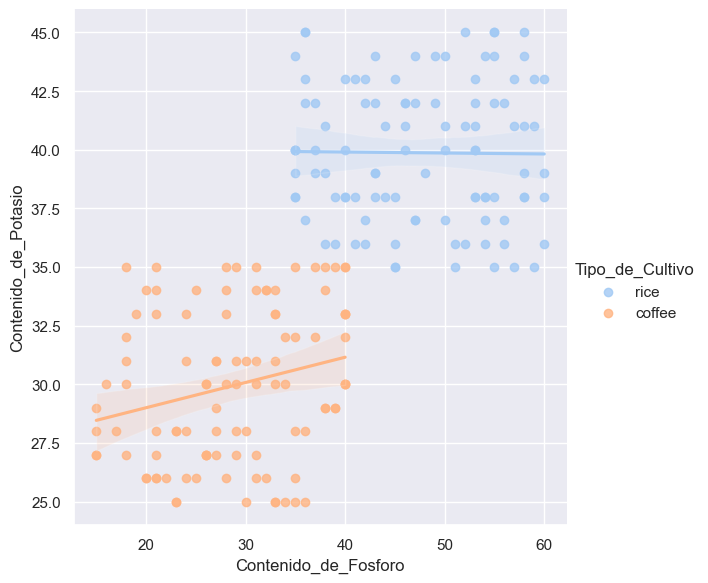

In [139]:
sns.lmplot(
    x="Contenido_de_Fosforo",
    y="Contenido_de_Potasio",
    data=somecultivos,
    hue="Tipo_de_Cultivo",
    palette=sns.color_palette("pastel"),  # Utiliza la paleta de colores para asignar colores a los tipos de cultivo,
    height=6)
sns.set()
plt.show()

#### Pie chart

In [154]:
pie = df.groupby("legal_status").species.count().reset_index()
pie.columns = ["legal_status", "cant"]

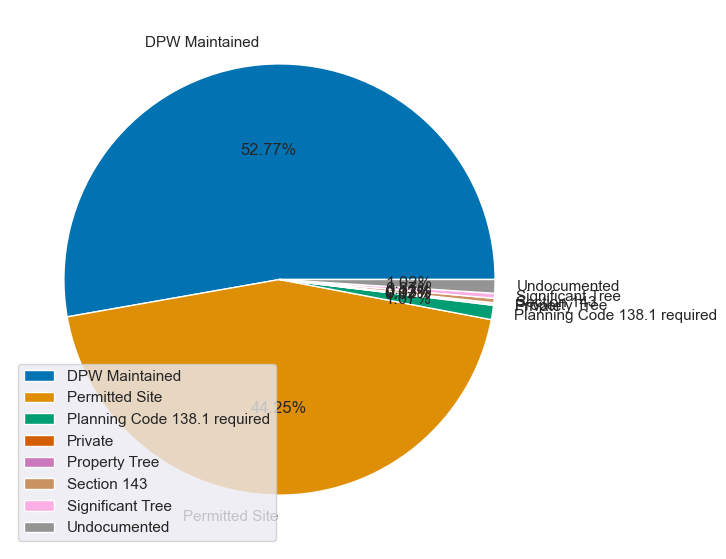

In [161]:
sns.set_palette('colorblind')
plt.figure(figsize=(7,7))
plt.pie(pie["cant"],
   labels=pie["legal_status"],
    autopct='%.2f%%')
plt.legend()
plt.show()

## Método get()


El método get() en Python se utiliza principalmente para acceder a un valor en un diccionario proporcionando una clave y, opcionalmente, un valor predeterminado en caso de que la clave no exista. 

Es todo chat gpt no entiendo nada

In [14]:
columna_legal_status = df.get('legal_status')
print(columna_legal_status)

0       DPW Maintained
1       DPW Maintained
2       Permitted Site
3       DPW Maintained
4       Permitted Site
             ...      
9995    DPW Maintained
9996    DPW Maintained
9997    DPW Maintained
9998    DPW Maintained
9999    DPW Maintained
Name: legal_status, Length: 10000, dtype: object


In [20]:
# Crear un DataFrame de ejemplo con una columna de diccionarios
data = {'diccionarios': [{'clave1': 10, 'clave2': 20}, {'clave2': 30}, {'clave1': 15}]}
df = pd.DataFrame(data)

# Obtener un valor específico de una clave en los diccionarios, con un valor predeterminado
valor = df['diccionarios'].apply(lambda x: x.get('clave1', 'No disponible'))
print(valor)

0               10
1    No disponible
2               15
Name: diccionarios, dtype: object


In [22]:
df

,diccionarios
0,"{'clave1': 10, 'clave2': 20}"
1,{'clave2': 30}
2,{'clave1': 15}


In [23]:
data = {'listas': [[1, 2, 3], [4, 5], [6, 7, 8, 9]]}
df = pd.DataFrame(data)

# Obtener el primer elemento de cada lista con un valor predeterminado si la lista está vacía
primer_elemento = df['listas'].apply(lambda x: x[0] if x else 'No disponible')
print(primer_elemento)

0    1
1    4
2    6
Name: listas, dtype: int64


In [26]:
df

,listas
0,"[1, 2, 3]"
1,"[4, 5]"
2,"[6, 7, 8, 9]"


## Mean and median

Media 

- Sensibilidad a outliers: La media es sensible a los valores atípicos o outliers en los datos. Un outlier puede afectar significativamente el valor de la media, ya que considera todos los valores en su cálculo.
- Distribuciones: En distribuciones simétricas y sin outliers, la media puede ser una medida representativa precisa.

Mediana 
- Sensibilidad a outliers: La mediana es menos sensible a los outliers en comparación con la media. Los valores extremos no afectan significativamente su valor, ya que solo se basa en el orden de los valores.
- Distribuciones: Para distribuciones sesgadas o con presencia de outliers, la mediana puede ser una medida más robusta y representativa del centro de los datos.

(-0.5, 1209.5, 301.5, -0.5)

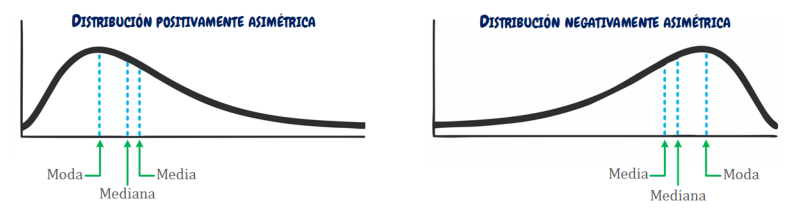

In [32]:
import matplotlib.image as mpimg
img = mpimg.imread('Distribuciones Asimetricas.png')
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')  # Para ocultar los ejes

- Si hay outliers muy grandes: media > mediana. Sacar el outlier y hacer la media o tomar la mediana.
- Si hay outliers muy chicos: media < mediana. Sacar el outlier y hacer la media o tomar la mediana

Si quiero sacar el percentil 1 o el percentil 99

In [ ]:
#Calcular el percentil 1 y el percentil 99
percentil_1 = df['income'].quantile(0.01)
percentil_99 = df['income'].quantile(0.99)

# Filtrar los datos dentro del rango del percentil 1% al 99%
df_filtrado = df[(df['income'] >= percentil_1) & (df['income'] <= percentil_99)]

print(df_filtrado)

Calcular mediana

In [ ]:
# Calcula la mediana de la columna 'income'
mediana_income = df['income'].median()

print("La mediana de la columna 'income' es:", mediana_income)